In [1]:
from laserhockey_main import main
import pylab as plt
import numpy as np
import laserhockey.hockey_env as h_env

In [2]:
def running_mean(x, N):
    return np.convolve(x, np.ones(N)/N, mode='valid')

In [3]:
m3ddpg = main()

In [4]:
rewards = m3ddpg.train(400000)

100%|███████████████████████████████████████████████████████████████████████| 500000/500000 [1:14:19<00:00, 112.13it/s]


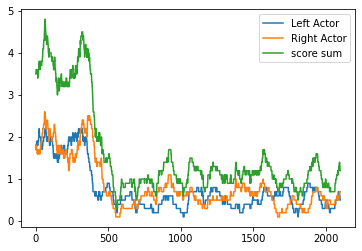

In [5]:
plt.close()
plt.plot(running_mean(rewards[:,0],100), label="Left Actor")
plt.plot(running_mean(rewards[:,1],100), label="Right Actor")
plt.plot(running_mean(np.array(rewards).sum(axis=1),100), label="score sum")
plt.legend()

In [6]:
env = h_env.HockeyEnv()

actor_left = m3ddpg.get_policy(0)
actor_right = m3ddpg.get_policy(1)

In [7]:
for _ in range(10):
    obs_left = env.reset()
    obs_right = env.obs_agent_two()
    for _ in range(250):
        env.render()
        action1 = actor_left(obs_left)
        action2 = actor_right(obs_right)
        obs_left, r, d, info = env.step(np.hstack([action1,action2]))
        obs_right = env.obs_agent_two()
        if d: break
env.close()